<a href="https://colab.research.google.com/github/marcinbartosiewicz/IndianBird/blob/main/IndianBird.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import os
import shutil
import pandas as pd
import numpy as np
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping,TensorBoard
from tensorflow.keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D,AveragePooling2D
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from google.colab import drive
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import densenet
from sklearn.metrics import confusion_matrix, classification_report
import keras.models
import plotly.figure_factory as ff
import ipywidgets as widgets

In [ ]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!mkdir ~/.kaggle

In [ ]:
!cp kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download arjunbasandrai/25-indian-bird-species-with-226k-images

100% 4.07G/4.07G [02:31<00:00, 37.2MB/s]
100% 4.07G/4.07G [02:31<00:00, 28.9MB/s]


In [ ]:
!unzip /content/25-indian-bird-species-with-226k-images.zip

Strumieniowane dane wyjściowe obcięte do 5000 ostatnich wierszy.
  inflating: training_set/Ruddy Shelduck/ML285073431.jpg  
  inflating: training_set/Ruddy Shelduck/ML285073441.jpg  
  inflating: training_set/Ruddy Shelduck/ML285073471.jpg  
  inflating: training_set/Ruddy Shelduck/ML285308851.jpg  
  inflating: training_set/Ruddy Shelduck/ML285974291.jpg  
  inflating: training_set/Ruddy Shelduck/ML286028601.jpg  
  inflating: training_set/Ruddy Shelduck/ML286515491.jpg  
  inflating: training_set/Ruddy Shelduck/ML286585111.jpg  
  inflating: training_set/Ruddy Shelduck/ML288186461.jpg  
  inflating: training_set/Ruddy Shelduck/ML288194981.jpg  
  inflating: training_set/Ruddy Shelduck/ML289170221.jpg  
  inflating: training_set/Ruddy Shelduck/ML291043411.jpg  
  inflating: training_set/Ruddy Shelduck/ML291399111.jpg  
  inflating: training_set/Ruddy Shelduck/ML291400271.jpg  
  inflating: training_set/Ruddy Shelduck/ML291402041.jpg  
  inflating: training_set/Ruddy Shelduck/ML2914020

In [ ]:
base_path='/content/training_set'
classes=[c for c in os.listdir(base_path)]

In [ ]:
classes

['White-Breasted Kingfisher',
 'Asian Green Bee-Eater',
 'White-Breasted Waterhen',
 'Red-Wattled Lapwing',
 'Ruddy Shelduck',
 'House Crow',
 'Common Myna',
 'Jungle Babbler',
 'Rufous Treepie',
 'Common Tailorbird',
 'Indian Peacock',
 'Hoopoe',
 'Common Rosefinch',
 'Gray Wagtail',
 'Indian Roller',
 'Brown-Headed Barbet',
 'Indian Grey Hornbill',
 'Forest Wagtail',
 'Coppersmith Barbet',
 'Northern Lapwing',
 'Common Kingfisher',
 'Cattle Egret',
 'Sarus Crane',
 'Indian Pitta',
 'White Wagtail']

In [ ]:

dropdown = widgets.Dropdown(options=classes,value=classes[0])
display(dropdown)


Dropdown(options=('White-Breasted Kingfisher', 'Asian Green Bee-Eater', 'White-Breasted Waterhen', 'Red-Wattle…

In [ ]:

files = os.listdir(os.path.join(base_path,dropdown.value))

slider = widgets.IntSlider(value=0, max=len(files)-1)
display(slider)

IntSlider(value=0, max=929)

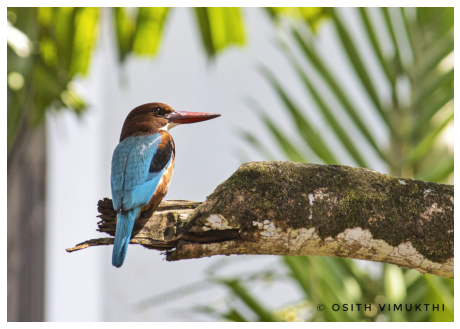

In [ ]:
drone_fnames=[format for format in os.listdir(os.path.join(base_path,dropdown.value))]
names_mapping = dict(enumerate(drone_fnames))
img_path=os.path.join(base_path,dropdown.value,names_mapping[slider.value])
img=image.load_img(img_path)
plt.figure(figsize=(8,8))
plt.imshow(img)
plt.grid(False)
_=plt.axis(False)

In [ ]:
for class_dir in os.listdir(base_path):
   
    class_path = os.path.join(base_path, class_dir)
    
    files = os.listdir(class_path)
 
    train_files, test_files = train_test_split(files, test_size=0.2, 
                                               random_state=23)
    
    train_files, val_files = train_test_split(train_files, test_size=0.2, 
                                              random_state=23)
    
    for set_name in ['train', 'test', 'val']:
        set_dir = os.path.join(class_path, set_name)
        os.makedirs(set_dir, exist_ok=True)
    
    for file in train_files:
        src_path = os.path.join(class_path, file)
        dst_path = os.path.join(class_path, 'train', file)
        shutil.move(src_path, dst_path)
    for file in test_files:
        src_path = os.path.join(class_path, file)
        dst_path = os.path.join(class_path, 'test', file)
        shutil.move(src_path, dst_path)
    for file in val_files:
        src_path = os.path.join(class_path, file)
        dst_path = os.path.join(class_path, 'val', file)
        shutil.move(src_path, dst_path)


'/content/'

In [ ]:
for set_name in ['test_set', 'val_set']:
  os.makedirs(os.path.join('/content/',set_name),exist_ok=True)
test_path=os.path.join('/content/','test_set')
val_path=os.path.join('/content/','val_set')
for class_dir in os.listdir(base_path):
  class_path = os.path.join(base_path, class_dir)
  os.makedirs(os.path.join(test_path,class_dir),exist_ok=True)
  os.makedirs(os.path.join(val_path,class_dir),exist_ok=True)
  src_path_test = os.path.join(class_path, 'test')
  src_path_val = os.path.join(class_path, 'val')
  shutil.move(src_path_test, os.path.join(test_path,class_dir))
  shutil.move(src_path_val, os.path.join(val_path,class_dir))




In [ ]:
train_datagen = ImageDataGenerator(
    rotation_range=40,    
    rescale=1./255.,
    width_shift_range=0.2, 
    height_shift_range=0.2, 
    shear_range=0.2,        
    zoom_range=0.2,         
    horizontal_flip=True,  
    fill_mode='nearest'     
)


In [ ]:
valid_datagen = ImageDataGenerator(rescale=1./255.)

train_generator = train_datagen.flow_from_directory(directory='/content/training_set',
                                                   target_size=(224, 224),
                                                   batch_size=32,
                                                   class_mode='categorical')

valid_generator = valid_datagen.flow_from_directory(directory='/content/val_set',
                                                   target_size=(224, 224),
                                                   batch_size=32,
                                                   class_mode='categorical')

Found 14467 images belonging to 25 classes.
Found 3623 images belonging to 25 classes.


In [ ]:
def display_augmented_images(directory, idx):
    
    fnames = [os.path.join(directory, fname) for fname in os.listdir(directory)]
    img_path = fnames[idx]
    img = image.load_img(img_path, target_size=(224, 224))

    x = image.img_to_array(img)
    x = x.reshape((1, ) + x.shape)

    i = 1
    plt.figure(figsize=(16, 8))
    for batch in train_datagen.flow(x, batch_size=1):
        plt.subplot(3, 4, i)
        plt.grid(False)
        plt.axis('off')
        imgplot = plt.imshow(image.array_to_img(batch[0]))
        i += 1
        if i % 13 == 0:
            break

In [ ]:
dropdown = widgets.Dropdown(options=classes,value=classes[0])
display(dropdown)

Dropdown(options=('White-Breasted Kingfisher', 'Asian Green Bee-Eater', 'White-Breasted Waterhen', 'Red-Wattle…

In [ ]:
files = os.listdir(os.path.join('/content/training_set',dropdown.value,'train'))

slider = widgets.IntSlider(value=0, max=len(files)-1)
display(slider)

IntSlider(value=0, max=594)

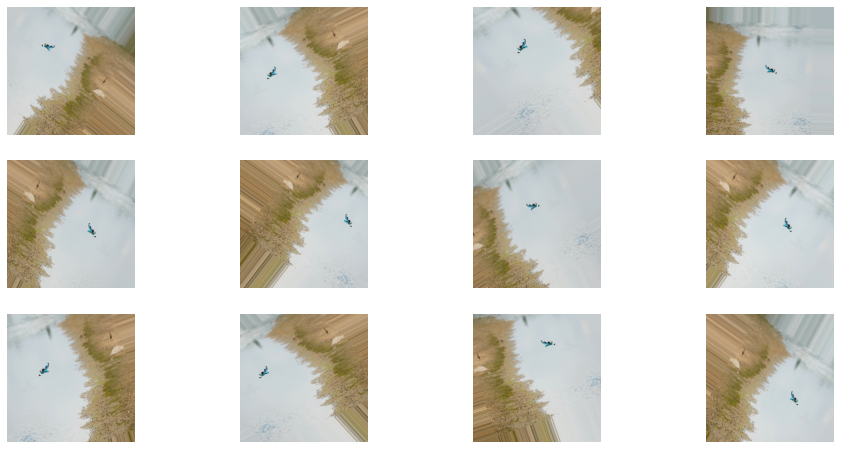

In [ ]:
train__dir=os.path.join('/content/training_set',dropdown.value,'train')
display_augmented_images(train__dir, slider.value)

In [ ]:

model = Sequential()


model.add(Conv2D(filters=6, kernel_size=(5, 5), activation='relu', input_shape = (224, 224, 3)))
model.add(AveragePooling2D())
model.add(Conv2D(filters=16, kernel_size=(5, 5), activation='relu'))
model.add(AveragePooling2D())
model.add(Conv2D(filters=120, kernel_size=(5, 5), activation='relu'))


model.add(Flatten())
model.add(Dense(units=84, activation='relu'))
model.add(Dense(units=25, activation='softmax'))


model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])



In [ ]:
!rm -rf logs
!mkdir logs

tensorboard = TensorBoard(log_dir='logs')

In [ ]:
batch_size = 32

steps_per_epoch = 14467 // batch_size
validation_steps = 3623 // batch_size
es = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', 
patience=4, min_delta=0.001, restore_best_weights=True)
history = model.fit_generator(generator=train_generator,
                             steps_per_epoch=steps_per_epoch,
                             epochs=100,    
                             validation_data=valid_generator,
                             validation_steps=validation_steps,
                             callbacks=[tensorboard,es])

<ipython-input-31-cdcf8b7bdad1>:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(generator=train_generator,


Epoch 1/100
113/113 [==============================] - 156s 1s/step - loss: 3.0707 - accuracy: 0.0987 - val_loss: 2.9997 - val_accuracy: 0.1272
Epoch 2/100
113/113 [==============================] - 153s 1s/step - loss: 3.0380 - accuracy: 0.1067 - val_loss: 2.9440 - val_accuracy: 0.1473
Epoch 3/100
113/113 [==============================] - 151s 1s/step - loss: 3.0119 - accuracy: 0.1217 - val_loss: 2.9524 - val_accuracy: 0.1507
Epoch 4/100
113/113 [==============================] - 153s 1s/step - loss: 2.9689 - accuracy: 0.1294 - val_loss: 2.8900 - val_accuracy: 0.1641
Epoch 5/100
113/113 [==============================] - 152s 1s/step - loss: 2.9668 - accuracy: 0.1253 - val_loss: 2.8398 - val_accuracy: 0.1702
Epoch 6/100
113/113 [==============================] - 152s 1s/step - loss: 2.8847 - accuracy: 0.1535 - val_loss: 2.8080 - val_accuracy: 0.1814
Epoch 7/100
113/113 [==============================] - 150s 1s/step - loss: 2.8682 - accuracy: 0.1502 - val_loss: 2.7180 - val_accuracy:

In [ ]:
batch_size = 32

steps_per_epoch = 14467 // batch_size
validation_steps = 3623 // batch_size
conv_base = densenet.DenseNet201(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
conv_base.trainable = False
set_trainable = False

74836368/74836368 [==============================] - 4s 0us/step


In [ ]:
model = Sequential(name='DenseNet201')
model.add(conv_base)
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(units=256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=25, activation='softmax'))

model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

model.summary()

Model: "DenseNet201"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet201 (Functional)    (None, 7, 7, 1920)        18321984  
                                                                 
 max_pooling2d (MaxPooling2D  (None, 3, 3, 1920)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 17280)             0         
                                                                 
 dense (Dense)               (None, 256)               4423936   
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                16448     
                                                       

In [ ]:
es = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', 
patience=5, min_delta=0.001, restore_best_weights=True)
filepath='/content/drive/MyDrive/ModelCheckPoint'
checkpoint=ModelCheckpoint(filepath,monitor='val_accuracy',verbose=1
                           ,save_best_only=True,mode='max')
history = model.fit_generator(generator=train_generator,
                             steps_per_epoch=steps_per_epoch,
                             epochs=100,    
                             validation_data=valid_generator,
                             validation_steps=validation_steps,
                             callbacks=[es,checkpoint])

<ipython-input-27-a01fb21de92e>:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(generator=train_generator,


Epoch 1/100
452/452 [==============================] - ETA: 0s - loss: 2.9972 - accuracy: 0.1330
Epoch 1: val_accuracy improved from -inf to 0.39657, saving model to /content/ModelCheckpoint


452/452 [==============================] - 755s 2s/step - loss: 2.9972 - accuracy: 0.1330 - val_loss: 1.9609 - val_accuracy: 0.3966
Epoch 2/100
452/452 [==============================] - ETA: 0s - loss: 1.9512 - accuracy: 0.4116
Epoch 2: val_accuracy improved from 0.39657 to 0.74419, saving model to /content/ModelCheckpoint


452/452 [==============================] - 727s 2s/step - loss: 1.9512 - accuracy: 0.4116 - val_loss: 0.8308 - val_accuracy: 0.7442
Epoch 3/100
452/452 [==============================] - ETA: 0s - loss: 1.3298 - accuracy: 0.6148
Epoch 3: val_accuracy improved from 0.74419 to 0.86366, saving model to /content/ModelCheckpoint


452/452 [==============================] - 714s 2s/step - loss: 1.3298 - accuracy: 0.6148 - val_loss: 0.4951 - val_accuracy: 0.8637
Epoch 4/100
452/452 [==============================] - ETA: 0s - loss: 1.0377 - accuracy: 0.6988
Epoch 4: val_accuracy improved from 0.86366 to 0.87998, saving model to /content/ModelCheckpoint


452/452 [==============================] - 715s 2s/step - loss: 1.0377 - accuracy: 0.6988 - val_loss: 0.4441 - val_accuracy: 0.8800
Epoch 5/100
452/452 [==============================] - ETA: 0s - loss: 0.9242 - accuracy: 0.7335
Epoch 5: val_accuracy improved from 0.87998 to 0.89270, saving model to /content/ModelCheckpoint


452/452 [==============================] - 714s 2s/step - loss: 0.9242 - accuracy: 0.7335 - val_loss: 0.4007 - val_accuracy: 0.8927
Epoch 6/100
452/452 [==============================] - ETA: 0s - loss: 0.8424 - accuracy: 0.7611
Epoch 6: val_accuracy improved from 0.89270 to 0.89934, saving model to /content/ModelCheckpoint


452/452 [==============================] - 708s 2s/step - loss: 0.8424 - accuracy: 0.7611 - val_loss: 0.3762 - val_accuracy: 0.8993
Epoch 7/100
452/452 [==============================] - ETA: 0s - loss: 0.8081 - accuracy: 0.7782
Epoch 7: val_accuracy improved from 0.89934 to 0.90708, saving model to /content/ModelCheckpoint


452/452 [==============================] - 651s 1s/step - loss: 0.8081 - accuracy: 0.7782 - val_loss: 0.3558 - val_accuracy: 0.9071
Epoch 8/100
452/452 [==============================] - ETA: 0s - loss: 0.7647 - accuracy: 0.7896
Epoch 8: val_accuracy did not improve from 0.90708
452/452 [==============================] - 621s 1s/step - loss: 0.7647 - accuracy: 0.7896 - val_loss: 0.3582 - val_accuracy: 0.8999
Epoch 9/100
452/452 [==============================] - ETA: 0s - loss: 0.7379 - accuracy: 0.7989
Epoch 9: val_accuracy improved from 0.90708 to 0.91261, saving model to /content/ModelCheckpoint


452/452 [==============================] - 700s 2s/step - loss: 0.7379 - accuracy: 0.7989 - val_loss: 0.3228 - val_accuracy: 0.9126
Epoch 10/100
452/452 [==============================] - ETA: 0s - loss: 0.7178 - accuracy: 0.8010
Epoch 10: val_accuracy improved from 0.91261 to 0.92201, saving model to /content/ModelCheckpoint


452/452 [==============================] - 702s 2s/step - loss: 0.7178 - accuracy: 0.8010 - val_loss: 0.2991 - val_accuracy: 0.9220
Epoch 11/100
452/452 [==============================] - ETA: 0s - loss: 0.7041 - accuracy: 0.8058
Epoch 11: val_accuracy did not improve from 0.92201
452/452 [==============================] - 618s 1s/step - loss: 0.7041 - accuracy: 0.8058 - val_loss: 0.3113 - val_accuracy: 0.9143
Epoch 12/100
452/452 [==============================] - ETA: 0s - loss: 0.6953 - accuracy: 0.8114
Epoch 12: val_accuracy did not improve from 0.92201
452/452 [==============================] - 618s 1s/step - loss: 0.6953 - accuracy: 0.8114 - val_loss: 0.3022 - val_accuracy: 0.9187
Epoch 13/100
452/452 [==============================] - ETA: 0s - loss: 0.6638 - accuracy: 0.8192
Epoch 13: val_accuracy improved from 0.92201 to 0.92450, saving model to /content/ModelCheckpoint


452/452 [==============================] - 700s 2s/step - loss: 0.6638 - accuracy: 0.8192 - val_loss: 0.2811 - val_accuracy: 0.9245
Epoch 14/100
452/452 [==============================] - ETA: 0s - loss: 0.6296 - accuracy: 0.8283
Epoch 14: val_accuracy did not improve from 0.92450
452/452 [==============================] - 615s 1s/step - loss: 0.6296 - accuracy: 0.8283 - val_loss: 0.2885 - val_accuracy: 0.9231
Epoch 15/100
452/452 [==============================] - ETA: 0s - loss: 0.6256 - accuracy: 0.8303
Epoch 15: val_accuracy did not improve from 0.92450
452/452 [==============================] - 616s 1s/step - loss: 0.6256 - accuracy: 0.8303 - val_loss: 0.2879 - val_accuracy: 0.9212
Epoch 16/100
452/452 [==============================] - ETA: 0s - loss: 0.6073 - accuracy: 0.8323
Epoch 16: val_accuracy did not improve from 0.92450
452/452 [==============================] - 623s 1s/step - loss: 0.6073 - accuracy: 0.8323 - val_loss: 0.2869 - val_accuracy: 0.9226
Epoch 17/100
452/452 [

In [ ]:
model=tf.keras.models.load_model('/content/drive/MyDrive/ModelCheckPoint')

In [ ]:
for layer in model.layers:
  if layer.name!='densenet201':
      layer.trainable=False
  else:
      layer.trainable=True
  print(f'layer_name: {layer.name:13} trainable: {layer.trainable}')  

layer_name: densenet201   trainable: True
layer_name: max_pooling2d trainable: False
layer_name: flatten       trainable: False
layer_name: dense         trainable: False
layer_name: dropout       trainable: False
layer_name: dense_1       trainable: False
layer_name: dropout_1     trainable: False
layer_name: dense_2       trainable: False
layer_name: dropout_2     trainable: False
layer_name: dense_3       trainable: False


In [ ]:
model.trainable=False

In [ ]:
conv_base=model.get_layer('densenet201')
conv_base.trainable = True
set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'conv5_block1_0_bn':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False
    print(f'layer_name: {layer.name:13} trainable: {layer.trainable}')    

layer_name: input_1       trainable: False
layer_name: zero_padding2d trainable: False
layer_name: conv1/conv    trainable: False
layer_name: conv1/bn      trainable: False
layer_name: conv1/relu    trainable: False
layer_name: zero_padding2d_1 trainable: False
layer_name: pool1         trainable: False
layer_name: conv2_block1_0_bn trainable: False
layer_name: conv2_block1_0_relu trainable: False
layer_name: conv2_block1_1_conv trainable: False
layer_name: conv2_block1_1_bn trainable: False
layer_name: conv2_block1_1_relu trainable: False
layer_name: conv2_block1_2_conv trainable: False
layer_name: conv2_block1_concat trainable: False
layer_name: conv2_block2_0_bn trainable: False
layer_name: conv2_block2_0_relu trainable: False
layer_name: conv2_block2_1_conv trainable: False
layer_name: conv2_block2_1_bn trainable: False
layer_name: conv2_block2_1_relu trainable: False
layer_name: conv2_block2_2_conv trainable: False
layer_name: conv2_block2_concat trainable: False
layer_name: conv2

In [ ]:
model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])
model.summary()

Model: "DenseNet201"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet201 (Functional)    (None, 7, 7, 1920)        18321984  
                                                                 
 max_pooling2d (MaxPooling2D  (None, 3, 3, 1920)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 17280)             0         
                                                                 
 dense (Dense)               (None, 256)               4423936   
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                16448     
                                                       

In [ ]:
batch_size = 32
steps_per_epoch = 14467 // batch_size
validation_steps = 3623 // batch_size
es = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', 
patience=3, min_delta=0.001, restore_best_weights=True)
filepath='/content/drive/MyDrive/ModelCheckPoint'
checkpoint=ModelCheckpoint(filepath,monitor='val_accuracy',verbose=1
                           ,save_best_only=True,mode='max')
fhistory = model.fit_generator(generator=train_generator,
                             steps_per_epoch=steps_per_epoch,
                             epochs=100,    
                             validation_data=valid_generator,
                             validation_steps=validation_steps
                              ,use_multiprocessing=True,
                               initial_epoch=18,
                             callbacks=[es,checkpoint])

<ipython-input-10-4c0cdaa72dcd>:9: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  fhistory = model.fit_generator(generator=train_generator,


Epoch 19/100
452/452 [==============================] - ETA: 0s - loss: 0.5053 - accuracy: 0.8708
Epoch 19: val_accuracy improved from -inf to 0.91869, saving model to /content/drive/MyDrive/ModelCheckPoint


452/452 [==============================] - 806s 2s/step - loss: 0.5053 - accuracy: 0.8708 - val_loss: 0.3502 - val_accuracy: 0.9187
Epoch 20/100
452/452 [==============================] - ETA: 0s - loss: 0.4724 - accuracy: 0.8760
Epoch 20: val_accuracy improved from 0.91869 to 0.93308, saving model to /content/drive/MyDrive/ModelCheckPoint


452/452 [==============================] - 752s 2s/step - loss: 0.4724 - accuracy: 0.8760 - val_loss: 0.2603 - val_accuracy: 0.9331
Epoch 21/100
391/452 [========================>.....] - ETA: 1:15 - loss: 0.4231 - accuracy: 0.8871

In [ ]:
batch_size = 32
steps_per_epoch = 14467 // batch_size
validation_steps = 3623 // batch_size
es = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', 
patience=4, min_delta=0.001, restore_best_weights=True)
filepath='/content/drive/MyDrive/ModelCheckPoint'
checkpoint=ModelCheckpoint(filepath,monitor='val_accuracy',verbose=1
                           ,save_best_only=True,mode='max')
fhistory = model.fit_generator(generator=train_generator,
                             steps_per_epoch=steps_per_epoch,
                             epochs=100,    
                             validation_data=valid_generator,
                             validation_steps=validation_steps
                              ,use_multiprocessing=True,
                               initial_epoch=21,
                             callbacks=[es,checkpoint])

<ipython-input-23-b0ab9eff8fc4>:9: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  fhistory = model.fit_generator(generator=train_generator,


Epoch 22/100
452/452 [==============================] - ETA: 0s - loss: 0.4753 - accuracy: 0.8759
Epoch 22: val_accuracy improved from -inf to 0.94303, saving model to /content/drive/MyDrive/ModelCheckPoint


452/452 [==============================] - 840s 2s/step - loss: 0.4753 - accuracy: 0.8759 - val_loss: 0.2311 - val_accuracy: 0.9430
Epoch 23/100
452/452 [==============================] - ETA: 0s - loss: 0.4422 - accuracy: 0.8836
Epoch 23: val_accuracy improved from 0.94303 to 0.94524, saving model to /content/drive/MyDrive/ModelCheckPoint


452/452 [==============================] - 809s 2s/step - loss: 0.4422 - accuracy: 0.8836 - val_loss: 0.2084 - val_accuracy: 0.9452
Epoch 24/100
452/452 [==============================] - ETA: 0s - loss: 0.4087 - accuracy: 0.8913
Epoch 24: val_accuracy did not improve from 0.94524
452/452 [==============================] - 685s 2s/step - loss: 0.4087 - accuracy: 0.8913 - val_loss: 0.2517 - val_accuracy: 0.9375
Epoch 25/100
452/452 [==============================] - ETA: 0s - loss: 0.4062 - accuracy: 0.8942
Epoch 25: val_accuracy improved from 0.94524 to 0.94801, saving model to /content/drive/MyDrive/ModelCheckPoint


452/452 [==============================] - 773s 2s/step - loss: 0.4062 - accuracy: 0.8942 - val_loss: 0.2024 - val_accuracy: 0.9480
Epoch 26/100
452/452 [==============================] - ETA: 0s - loss: 0.3711 - accuracy: 0.9032
Epoch 26: val_accuracy did not improve from 0.94801
452/452 [==============================] - 674s 1s/step - loss: 0.3711 - accuracy: 0.9032 - val_loss: 0.2343 - val_accuracy: 0.9477
Epoch 27/100
452/452 [==============================] - ETA: 0s - loss: 0.3551 - accuracy: 0.9059
Epoch 27: val_accuracy improved from 0.94801 to 0.94912, saving model to /content/drive/MyDrive/ModelCheckPoint


452/452 [==============================] - 802s 2s/step - loss: 0.3551 - accuracy: 0.9059 - val_loss: 0.2172 - val_accuracy: 0.9491
Epoch 28/100
452/452 [==============================] - ETA: 0s - loss: 0.3435 - accuracy: 0.9088
Epoch 28: val_accuracy did not improve from 0.94912
452/452 [==============================] - 678s 1s/step - loss: 0.3435 - accuracy: 0.9088 - val_loss: 0.2237 - val_accuracy: 0.9480
Epoch 29/100
452/452 [==============================] - ETA: 0s - loss: 0.3226 - accuracy: 0.9153
Epoch 29: val_accuracy improved from 0.94912 to 0.94994, saving model to /content/drive/MyDrive/ModelCheckPoint


452/452 [==============================] - 787s 2s/step - loss: 0.3226 - accuracy: 0.9153 - val_loss: 0.2025 - val_accuracy: 0.9499
Epoch 30/100
452/452 [==============================] - ETA: 0s - loss: 0.3196 - accuracy: 0.9176
Epoch 30: val_accuracy did not improve from 0.94994
452/452 [==============================] - 690s 2s/step - loss: 0.3196 - accuracy: 0.9176 - val_loss: 0.2449 - val_accuracy: 0.9494
Epoch 31/100
452/452 [==============================] - ETA: 0s - loss: 0.3103 - accuracy: 0.9160
Epoch 31: val_accuracy did not improve from 0.94994
452/452 [==============================] - 682s 2s/step - loss: 0.3103 - accuracy: 0.9160 - val_loss: 0.2481 - val_accuracy: 0.9441


In [ ]:
model.save('/content/drive/MyDrive')

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255.)
test_generator = test_datagen.flow_from_directory(
    directory='/content/test_set',
    target_size=(224, 224),
    batch_size=1,
    class_mode='categorical',
    shuffle=False
)

y_prob = model.predict_generator(test_generator, test_generator.samples)
y_prob

Found 4530 images belonging to 25 classes.


<ipython-input-24-ba260ccd04ed>:10: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  y_prob = model.predict_generator(test_generator, test_generator.samples)


array([[0.9998903     , 0.000000135978, 0.            , ..., 0.            , 0.000000003866, 0.000000000002],
       [0.28558707    , 0.19512649    , 0.00007077536 , ..., 0.00012722627 , 0.005615484   , 0.0010296719  ],
       [0.9999685     , 0.000000225232, 0.            , ..., 0.            , 0.000000003142, 0.000000000011],
       ...,
       [0.000000062714, 0.000002946177, 0.000048206373, ..., 0.00008925012 , 0.000011416379, 0.9694027     ],
       [0.            , 0.000000000007, 0.00000008412 , ..., 0.000005422099, 0.000000000477, 0.9992975     ],
       [0.            , 0.            , 0.000000000006, ..., 0.000000000001, 0.            , 0.99999964    ]],
      dtype=float32)

In [ ]:
y_pred = np.argmax(y_prob, axis=1)
y_pred
     

array([ 0,  7,  0, ..., 24, 24, 24])

In [ ]:
predictions  = pd.DataFrame({'class': y_pred})
predictions

,class
0,0
1,7
2,0
3,0
4,0
...,...
4525,24
4526,24
4527,24
4528,24


In [ ]:
y_true = test_generator.classes
y_true

array([ 0,  0,  0, ..., 24, 24, 24], dtype=int32)

In [ ]:
y_pred = predictions['class'].values
y_pred

array([ 0,  7,  0, ..., 24, 24, 24])

In [ ]:
test_generator.class_indices

{'Asian Green Bee-Eater': 0,
 'Brown-Headed Barbet': 1,
 'Cattle Egret': 2,
 'Common Kingfisher': 3,
 'Common Myna': 4,
 'Common Rosefinch': 5,
 'Common Tailorbird': 6,
 'Coppersmith Barbet': 7,
 'Forest Wagtail': 8,
 'Gray Wagtail': 9,
 'Hoopoe': 10,
 'House Crow': 11,
 'Indian Grey Hornbill': 12,
 'Indian Peacock': 13,
 'Indian Pitta': 14,
 'Indian Roller': 15,
 'Jungle Babbler': 16,
 'Northern Lapwing': 17,
 'Red-Wattled Lapwing': 18,
 'Ruddy Shelduck': 19,
 'Rufous Treepie': 20,
 'Sarus Crane': 21,
 'White Wagtail': 22,
 'White-Breasted Kingfisher': 23,
 'White-Breasted Waterhen': 24}

In [ ]:
classes = list(test_generator.class_indices.keys())
classes

['Asian Green Bee-Eater',
 'Brown-Headed Barbet',
 'Cattle Egret',
 'Common Kingfisher',
 'Common Myna',
 'Common Rosefinch',
 'Common Tailorbird',
 'Coppersmith Barbet',
 'Forest Wagtail',
 'Gray Wagtail',
 'Hoopoe',
 'House Crow',
 'Indian Grey Hornbill',
 'Indian Peacock',
 'Indian Pitta',
 'Indian Roller',
 'Jungle Babbler',
 'Northern Lapwing',
 'Red-Wattled Lapwing',
 'Ruddy Shelduck',
 'Rufous Treepie',
 'Sarus Crane',
 'White Wagtail',
 'White-Breasted Kingfisher',
 'White-Breasted Waterhen']

In [ ]:
cm = confusion_matrix(y_true, y_pred)


In [ ]:
def plot_confusion_matrix(cm):
    
    cm = cm[::-1]
    cm = pd.DataFrame(cm, columns=classes, index=classes[::-1])

    fig = ff.create_annotated_heatmap(z=cm.values, x=list(cm.columns),
    y=list(cm.index), colorscale='ice', showscale=True, reversescale=True)
    fig.update_layout(width=800, height=800,font_size=10)
    fig.show()


plot_confusion_matrix(cm)

In [ ]:
print(classification_report(y_true, y_pred, target_names=test_generator.class_indices.keys()))

                           precision    recall  f1-score   support

    Asian Green Bee-Eater       1.00      0.98      0.99       185
      Brown-Headed Barbet       0.88      0.97      0.92       185
             Cattle Egret       0.99      0.99      0.99       184
        Common Kingfisher       1.00      0.99      0.99       185
              Common Myna       0.98      0.96      0.97       186
         Common Rosefinch       0.96      0.89      0.92       184
        Common Tailorbird       0.97      0.90      0.93       184
       Coppersmith Barbet       0.97      0.94      0.95       156
           Forest Wagtail       0.98      0.92      0.95       185
             Gray Wagtail       0.97      0.97      0.97       186
                   Hoopoe       1.00      0.99      1.00       185
               House Crow       0.99      0.91      0.95       185
     Indian Grey Hornbill       0.95      0.92      0.94       185
           Indian Peacock       1.00      0.99      0.99     

In [ ]:
errors = pd.DataFrame({'y_true': y_true, 'y_pred': y_pred}, index=test_generator.filenames)
errors

,y_true,y_pred
Asian Green Bee-Eater/test/ML100845971.jpg,0,0
Asian Green Bee-Eater/test/ML101100981.jpg,0,7
Asian Green Bee-Eater/test/ML101482411.jpg,0,0
Asian Green Bee-Eater/test/ML101726781.jpg,0,0
Asian Green Bee-Eater/test/ML104483071.jpg,0,0
...,...,...
White-Breasted Waterhen/test/ML87549481.jpg,24,24
White-Breasted Waterhen/test/ML90943891.jpg,24,24
White-Breasted Waterhen/test/ML91248271.jpg,24,24
White-Breasted Waterhen/test/ML94258761.jpg,24,24


In [ ]:
errors['is_incorrect'] = (errors['y_true'] != errors['y_pred']) * 1
errors

,y_true,y_pred,is_incorrect
Asian Green Bee-Eater/test/ML100845971.jpg,0,0,0
Asian Green Bee-Eater/test/ML101100981.jpg,0,7,1
Asian Green Bee-Eater/test/ML101482411.jpg,0,0,0
Asian Green Bee-Eater/test/ML101726781.jpg,0,0,0
Asian Green Bee-Eater/test/ML104483071.jpg,0,0,0
...,...,...,...
White-Breasted Waterhen/test/ML87549481.jpg,24,24,0
White-Breasted Waterhen/test/ML90943891.jpg,24,24,0
White-Breasted Waterhen/test/ML91248271.jpg,24,24,0
White-Breasted Waterhen/test/ML94258761.jpg,24,24,0


In [ ]:
errors[errors['is_incorrect'] == 1].index

Index(['Asian Green Bee-Eater/test/ML101100981.jpg',
       'Asian Green Bee-Eater/test/ML23537991.jpg',
       'Asian Green Bee-Eater/test/ML275808201.jpg',
       'Asian Green Bee-Eater/test/ML74775411.jpg',
       'Brown-Headed Barbet/test/ML150174711.jpg',
       'Brown-Headed Barbet/test/ML213985171.jpg',
       'Brown-Headed Barbet/test/ML226716741.jpg',
       'Brown-Headed Barbet/test/ML289310351.jpg',
       'Brown-Headed Barbet/test/ML36581881.jpg',
       'Cattle Egret/test/ML238072711.jpg',
       ...
       'Sarus Crane/test/ML255575191.jpg', 'Sarus Crane/test/ML388194941.jpg',
       'Sarus Crane/test/ML728283.jpg', 'White Wagtail/test/ML339404141.jpg',
       'White Wagtail/test/ML347801051.jpg',
       'White-Breasted Kingfisher/test/ML204861281.jpg',
       'White-Breasted Kingfisher/test/ML409590811.jpg',
       'White-Breasted Waterhen/test/ML145986211.jpg',
       'White-Breasted Waterhen/test/ML153389121.jpg',
       'White-Breasted Waterhen/test/ML200753321.jpg'],

In [ ]:
files = list(errors[errors['is_incorrect'] == 1].index)

slider = widgets.IntSlider(value=0, max=len(files)-1)
display(slider)

IntSlider(value=0, max=169)

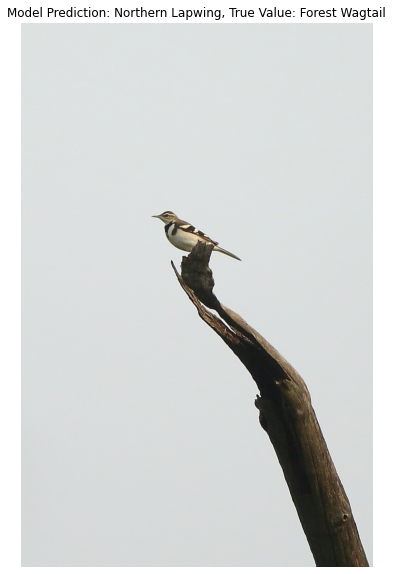

In [ ]:
inverted_dict={value:key for key,value in test_generator.class_indices.items()}
true=errors.loc[files[slider.value]].values[0]
pred=errors.loc[files[slider.value]].values[1]
img_path=os.path.join('/content/test_set',files[slider.value])
img=image.load_img(img_path)
plt.figure(figsize=(10,10))
plt.imshow(img)
plt.grid(False)
plt.title(f"Model Prediction: {inverted_dict[pred]}, True Value: {inverted_dict[true]}")
_=plt.axis(False)